In [4]:
## Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## To draw DT
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

## Embeded Datasets
from sklearn import datasets

## For shuffling the Dataset
from sklearn import utils

## Metric
from sklearn.metrics import accuracy_score

## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict

## Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Ensemble Models (There is for Classification and Regression)
from sklearn.ensemble import VotingClassifier, VotingRegressor                          ## One for each task
from sklearn.ensemble import BaggingClassifier, BaggingRegressor                        ## One for each task
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor              ## one for each task
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor                      ## one for each task
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor      ## one for each task


## XGBoost
from xgboost import XGBRegressor, XGBClassifier


## `Classification`

### `Loading the iris Dataset`

In [5]:
## Load the iris dataset from the embeded datasets provided in sklearn
iris_dataset = datasets.load_iris()

## check the dataset by checking its keys
iris_dataset.keys()           ## each key has data or information

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
## Let's get all together and create a DF
## I will do it in very fast way and it is my preferable one, but there are many ways as we learned together 

df_iris = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target'].reshape(-1, 1)], 
                       columns=iris_dataset['feature_names']+['target'])

## check the head
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
## Let's shuffle the Dataset as you see that the target is ordered (0 then 1 then 2) --> Classification problem
## You can use function (sample) provided in pandas or use (shuffle) in sklearn
df_iris = utils.shuffle(df_iris, random_state=42)   ## shuffle and overwrite

## check the head again
df_iris.head()    ## OK

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
73,6.1,2.8,4.7,1.2,1.0
18,5.7,3.8,1.7,0.3,0.0
118,7.7,2.6,6.9,2.3,2.0
78,6.0,2.9,4.5,1.5,1.0
76,6.8,2.8,4.8,1.4,1.0


In [8]:
### Split the Dataset to Features and Target
X = df_iris.drop(columns=['target'], axis=1)
y = df_iris['target']

In [9]:
## Let's impute (although there is no nulls) and standardize the Dataset ---> All in Pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
                              ]
                       )

X_train = num_pipeline.fit_transform(X)
y_train = y.copy()   ## doesn't matter

### `Building a ML Model`
* `Evaluation Metric is Accuracy`

### `1. Logistic Regression` 

In [10]:
## Logistic Regression
logit_clf = LogisticRegression(C=0.1)
logit_clf.fit(X_train, y_train)  ## Train

LogisticRegression(C=0.1)

In [11]:
## Using cross validation for prediction and evaluation
acc_scores_logit = cross_val_score(estimator=logit_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "Logistic Regression" -- {acc_scores_logit.mean():.3f}', )

## Prediction using cross validation
y_pred_logit = cross_val_predict(estimator=logit_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Logistic Regression" -- 0.913


### `2. KNN`

In [12]:
## Using KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)  ## Train

KNeighborsClassifier()

In [13]:
## Using cross validation for prediction and evaluation
acc_scores_knn = cross_val_score(estimator=knn_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "KNN" -- {acc_scores_knn.mean():.3f}', )

## Prediction using cross validation
y_pred_knn = cross_val_predict(estimator=knn_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "KNN" -- 0.947


### `3. SVC`

In [14]:
## Using SVMs
svm_clf = SVC(kernel='linear', C=0.1, probability=True)
svm_clf.fit(X_train, y_train)  ## Train

SVC(C=0.1, kernel='linear', probability=True)

In [15]:
## Using cross validation for prediction and evaluation
acc_scores_svm = cross_val_score(estimator=svm_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "SVM" -- {acc_scores_svm.mean():.3f}', )

## Prediction using cross validation
y_pred_svm = cross_val_predict(estimator=svm_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "SVM" -- 0.947


### `Decision Trees`

In [16]:
## Decison Trees
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_clf.fit(X_train, y_train)  ## Train

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
## Using cross validation for prediction and evaluation
acc_scores_tree = cross_val_score(estimator=tree_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "Decision Trees" -- {acc_scores_tree.mean():.3f}', )

## Prediction using cross validation
y_pred_tree = cross_val_predict(estimator=tree_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Decision Trees" -- 0.960


> * `Enough, Let's vote all the above models`

### `Voting Classifiers`

In [18]:
## Voting the above 4 models, firstly --------> try tuning the above models before voting
voting_clf = VotingClassifier(estimators=
                                    [
                                        ('logit', logit_clf),
                                        ('knn', knn_clf),
                                        ('svm', svm_clf),
                                        ('tree', tree_clf)
                                    ], 
                              voting='hard'      ## --> Try using (hard), take your time playing with code.
                            )
## deal with the (voting_clf) as an ordinary model                
voting_clf.fit(X_train, y_train)  ## Train

VotingClassifier(estimators=[('logit', LogisticRegression(C=0.1)),
                             ('knn', KNeighborsClassifier()),
                             ('svm',
                              SVC(C=0.1, kernel='linear', probability=True)),
                             ('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3))])

In [19]:
## Using cross validation for prediction and evaluation
acc_scores_voting = cross_val_score(estimator=voting_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "Voting Classifier" -- {acc_scores_voting.mean():.3f}', )

## Prediction using cross validation
y_pred_voting = cross_val_predict(estimator=voting_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Voting Classifier" -- 0.960


In [20]:
## Getting all together 
models_outs = {logit_clf:y_pred_logit, 
               knn_clf:y_pred_knn, 
               svm_clf:y_pred_svm, 
               tree_clf:y_pred_tree, 
               voting_clf:y_pred_voting}

for idx, clf in enumerate(models_outs.keys()):
    y_pred_each_clf = [*models_outs.values()][idx]   ## prediction for each model
    acc_score = accuracy_score(y_train, y_pred_each_clf)   ## accuracy
    print(clf.__class__.__name__, '-------', f'Accuracy score is : {acc_score:.4f}')

LogisticRegression ------- Accuracy score is : 0.9133
KNeighborsClassifier ------- Accuracy score is : 0.9467
SVC ------- Accuracy score is : 0.9467
DecisionTreeClassifier ------- Accuracy score is : 0.9600
VotingClassifier ------- Accuracy score is : 0.9600


### `Bagging & Pasting`

In [21]:
## Bagging and pasting for Decision Trees  ---> take your time discovering the hyperparameters
## (max_samples) & (max_features) --> when (float) it will be a ratio from samples and features 
## (max_samples) & (max_features) --> when (int) the number taken from samples and features 
## (bootstrap_features) is working the same as (bootstrap) working but for features, (bootstrap) for samples.. --> take care
bag_clf = BaggingClassifier(
                  base_estimator=DecisionTreeClassifier(max_depth=3, criterion='entropy'),    ## the base model itself
                  n_estimators=500,                       ## Number of predictors (imortant Hyperparam)
                  max_samples=0.8, max_features=1.0,     
                  bootstrap=True,                         ## True --> Bagging & False --> Pasting
                  oob_score=True,                         ## If you want to evaluate on oob set
                  random_state=42, n_jobs=-1              ## Additional params
                          )             

bag_clf.fit(X_train, y_train)  ## train and deal with it as an ordinary model 

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3),
                  max_samples=0.8, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [22]:
## Using cross validation for prediction and evaluation
acc_scores_bagTree = cross_val_score(estimator=bag_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "Bagging of DT" -- {acc_scores_bagTree.mean():.3f}', )

## oob now will be an attribute in the model as we set to True in the model
## oob score gives an indication about the final score on test set, as model doesn't touch them while training.
print('Evaluation of Out-of-Bag set is -- ', bag_clf.oob_score_)

## Prediction using cross validation
y_pred_bagTree = cross_val_predict(estimator=bag_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Bagging of DT" -- 0.953
Evaluation of Out-of-Bag set is --  0.96


In [23]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-2, 2, -2, 2], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    if X.shape[1] == 4:
        y_pred = clf.predict(np.c_[X_new, X_new]).reshape(x1.shape)
    elif X.shape[1] == 2:
         y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, -2][y==0], X[:, -1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, -2][y==1], X[:, -1][y==1], "bs", alpha=alpha)
    plt.plot(X[:, -2][y==2], X[:, -1][y==2], "ro", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

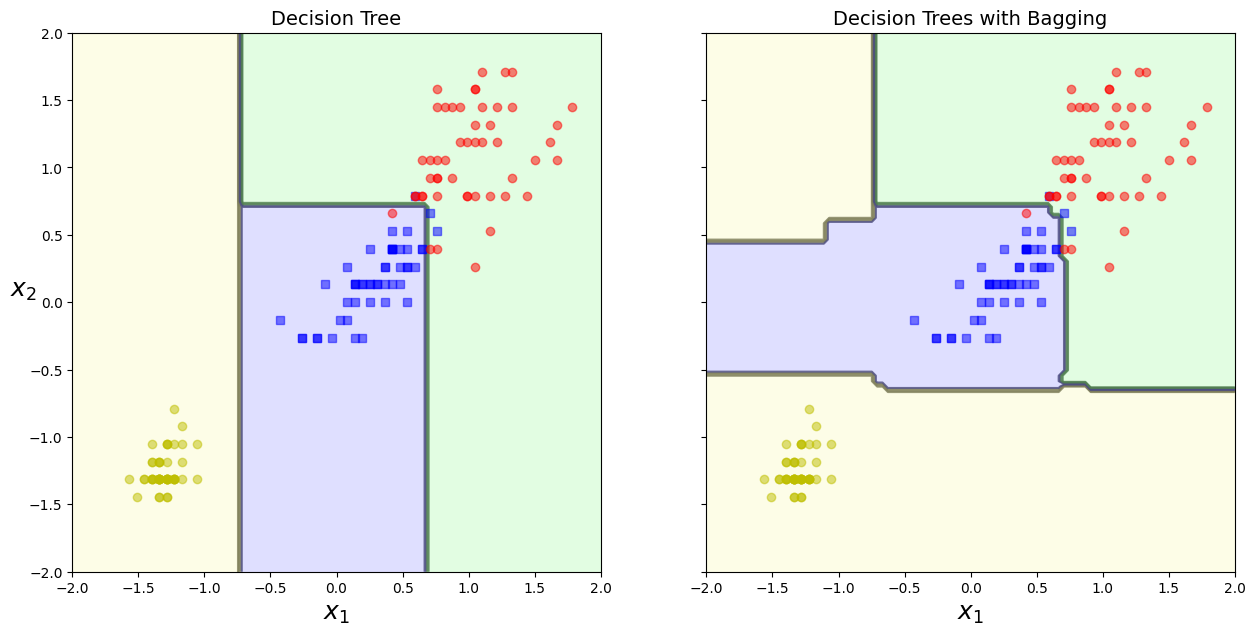

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(15,7), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, np.uint8(y_train))
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, np.uint8(y_train))
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X_moon, y_moon = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moon, y_moon, random_state=42)

In [26]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=1000,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train_m, y_train_m)
tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X_train_m, y_train_m)

DecisionTreeClassifier(random_state=42)

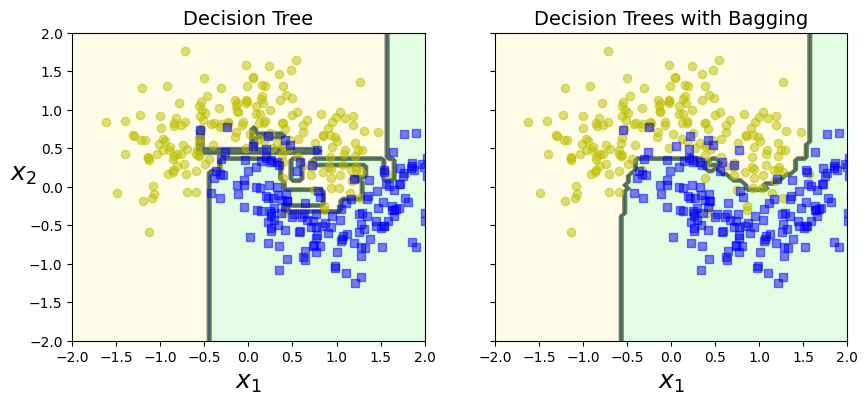

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train_m, y_train_m)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train_m, y_train_m)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

### `RandomForest`

In [28]:

## The above RandomForest Model is equal to the following Bagging
equal_forest = BaggingClassifier( 
                                base_estimator=DecisionTreeClassifier(max_depth=3, 
                                                                        splitter='random',   ## random split
                                                                        criterion='entropy', 
                                                                        max_leaf_nodes=10), 
                                n_estimators=500,
                                max_features=1.0, 
                                max_samples=0.8
                                )

In [29]:
## Using cross validation for prediction and evaluation
bag_clf.fit(X_train, y_train)  ## train
acc_scores_forest = cross_val_score(estimator=equal_forest, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "RandomForest" -- {acc_scores_forest.mean():.3f}', )

## Prediction using cross validation
y_pred_forest = cross_val_predict(estimator=equal_forest, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "RandomForest" -- 0.953


In [30]:
## One of the most powerfull ML models avilable today, RandomForest (all is random)
## Instead of building number of DT using Bagging, sklearn implemented RandomForest Model and it is very optimized

forest_clf = RandomForestClassifier(n_estimators=500, max_depth=3, max_leaf_nodes=10, 
                                    criterion='entropy', max_features=1.0, max_samples=0.8)
forest_clf.fit(X_train, y_train)  ## train

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=1.0,
                       max_leaf_nodes=10, max_samples=0.8, n_estimators=500)

In [31]:
## Using cross validation for prediction and evaluation
acc_scores_forest = cross_val_score(estimator=forest_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "RandomForest" -- {acc_scores_forest.mean():.3f}', )

## Prediction using cross validation
y_pred_forest = cross_val_predict(estimator=forest_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "RandomForest" -- 0.953


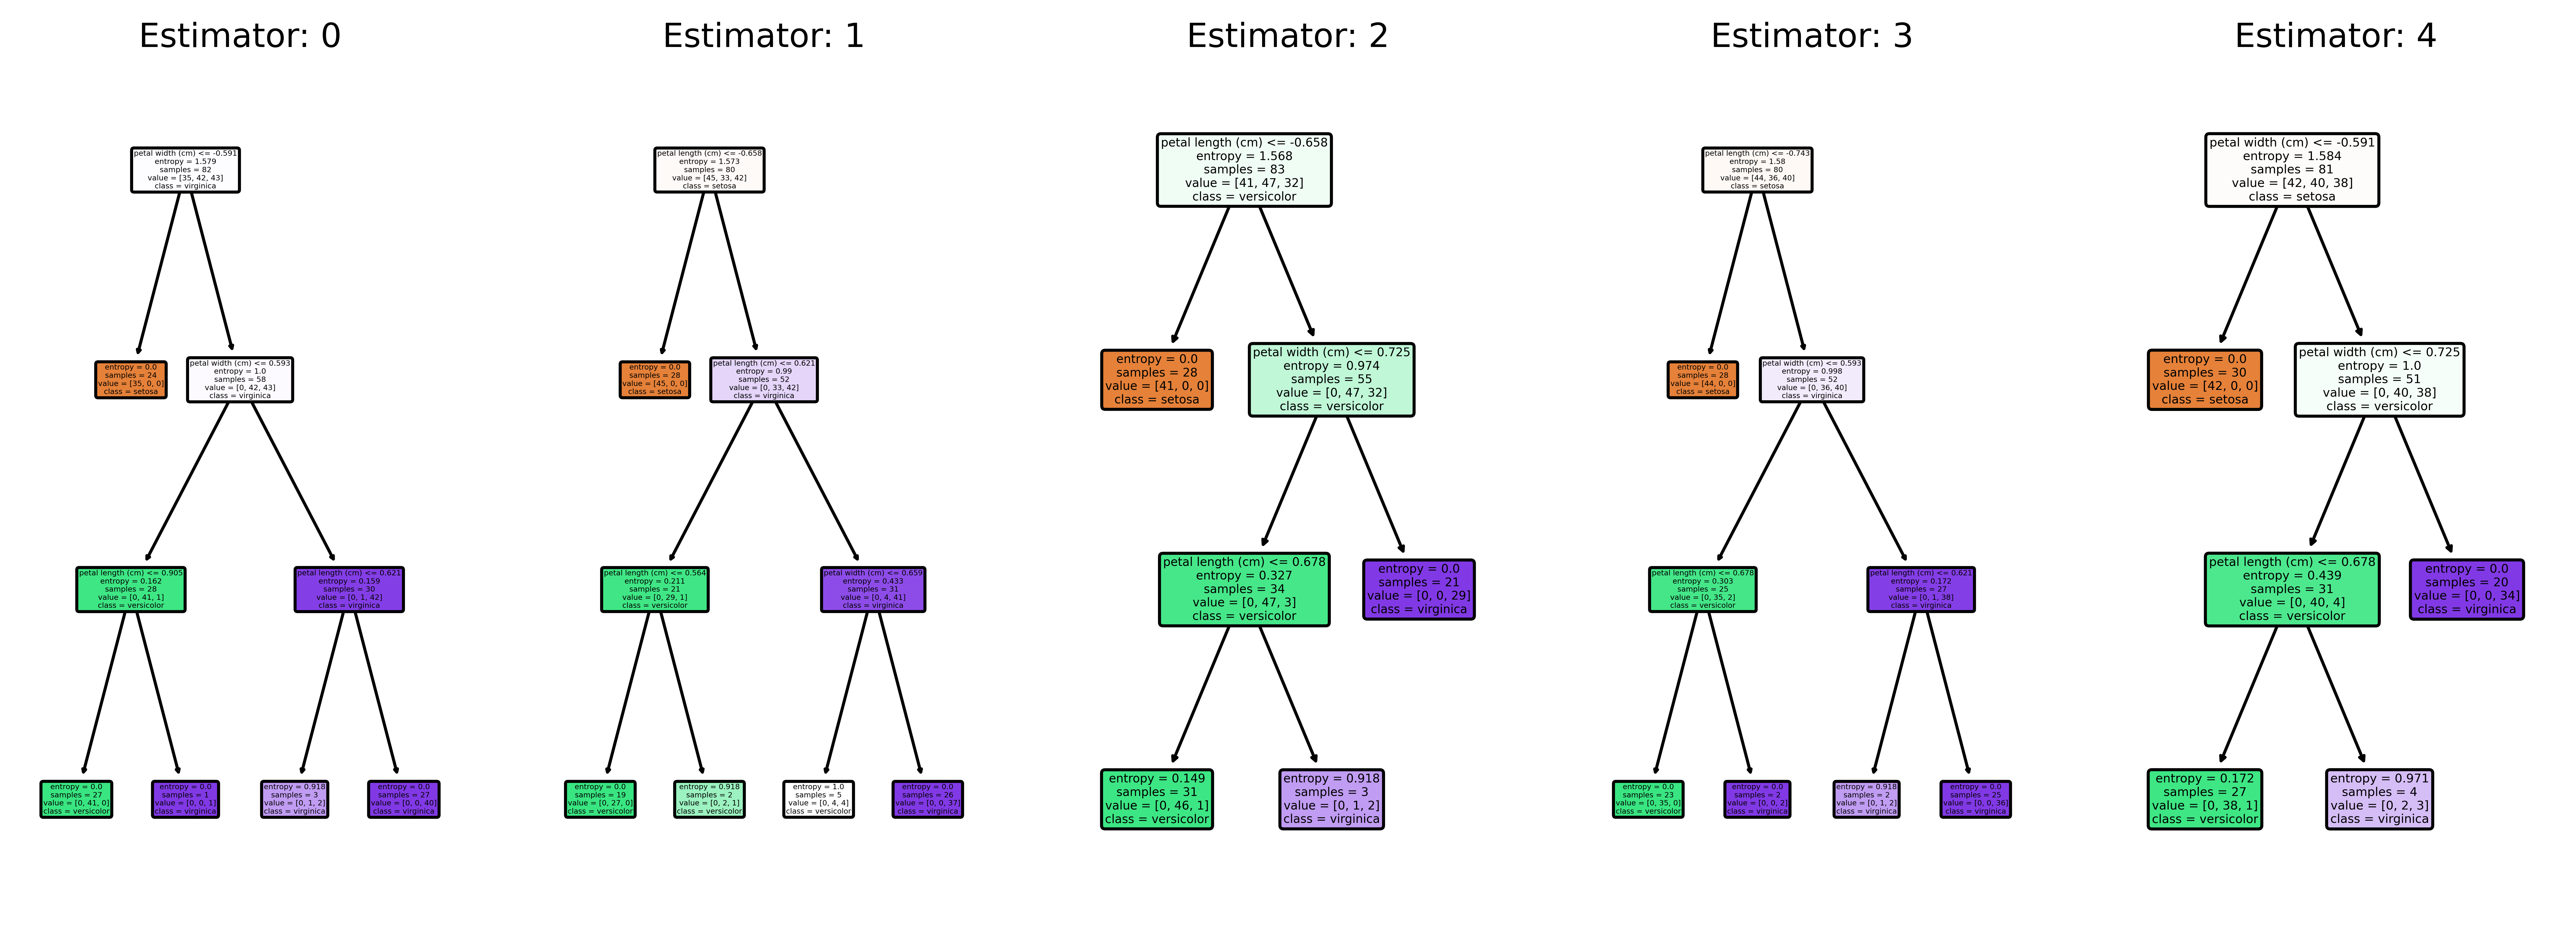

In [32]:
from sklearn.tree import plot_tree# DOT data
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (15,5), dpi=900)

for index in range(0, 5):

    dot_data = plot_tree(forest_clf.estimators_[index],
                            feature_names=iris_dataset['feature_names'], 
                            class_names=iris_dataset['target_names'], 
                            filled=True, rounded=True, ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# Draw graph

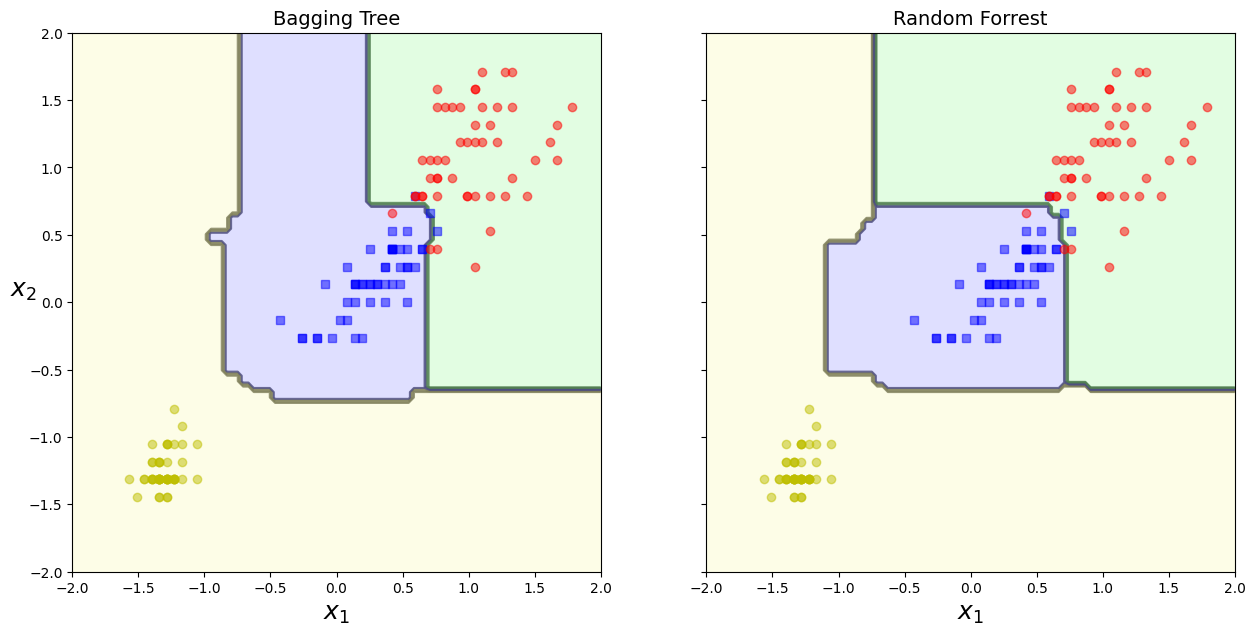

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(15,7), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(bag_clf, X_train, np.uint8(y_train))
plt.title("Bagging Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(forest_clf, X_train, np.uint8(y_train))
plt.title("Random Forrest", fontsize=14)
plt.ylabel("")
plt.show()

### `Feature Importance using RF`

In [34]:
## Getting the Features Importance (they are normalized in RF, sum=1)
feat_dict = {}      ## to append in it
for name, score in zip(iris_dataset['feature_names'], forest_clf.feature_importances_):  ## using the attribute provided
    feat_dict[name] = score

## Features are keys, Importance is the value
keys_forest = feat_dict.keys()
values_forest = feat_dict.values()

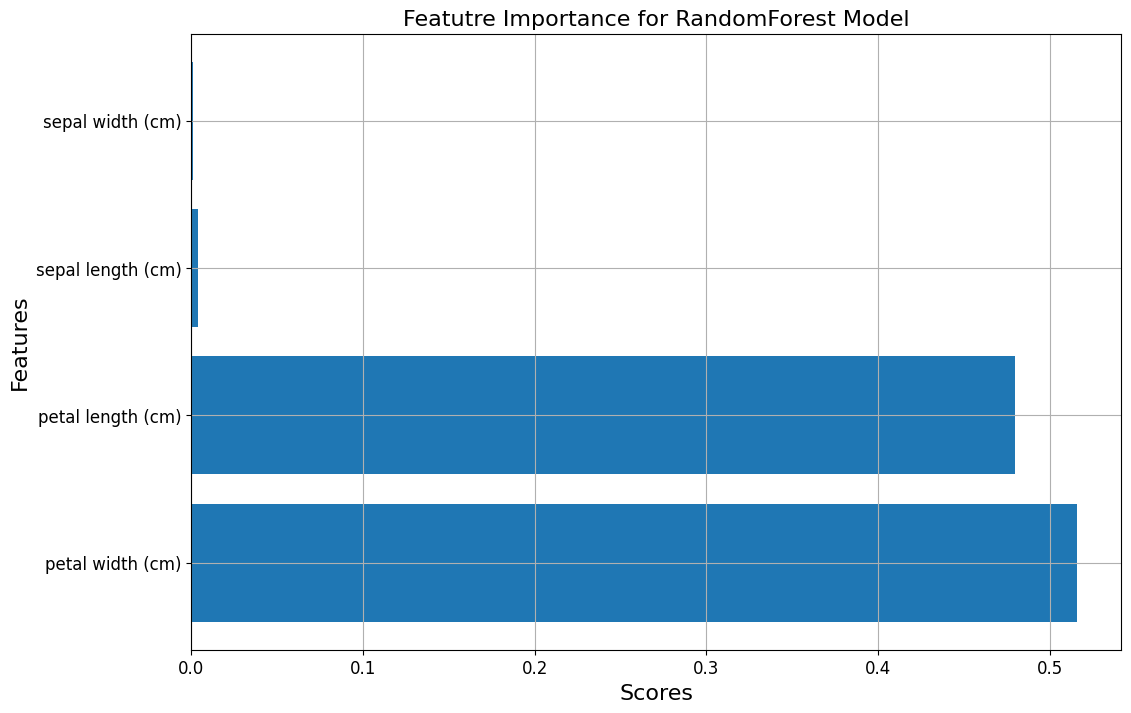

In [35]:
## to DF and then plotting
df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'Scores': values_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)

## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title('Featutre Importance for RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

### `Boosting`
* > `The general idea of most boosting methods is to train predictors "sequentially", each trying to correct its predecessor. `

### `Adaboost`

In [36]:
## using adaboost for DT as the base estimator
adaboost_clf = AdaBoostClassifier(
                                    base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3), 
                                    n_estimators=100, 
                                    algorithm='SAMME.R', 
                                    learning_rate=0.5
                                  )
adaboost_clf.fit(X_train, y_train)  ## train

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3),
                   learning_rate=0.5, n_estimators=100)

In [37]:
## Using cross validation for prediction and evaluation
acc_scores_adaboost = cross_val_score(estimator=adaboost_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "Adaboost" -- {acc_scores_adaboost.mean():.3f}', )

## Prediction using cross validation
y_pred_adaboost = cross_val_predict(estimator=adaboost_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Adaboost" -- 0.947


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14568\1733532629.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


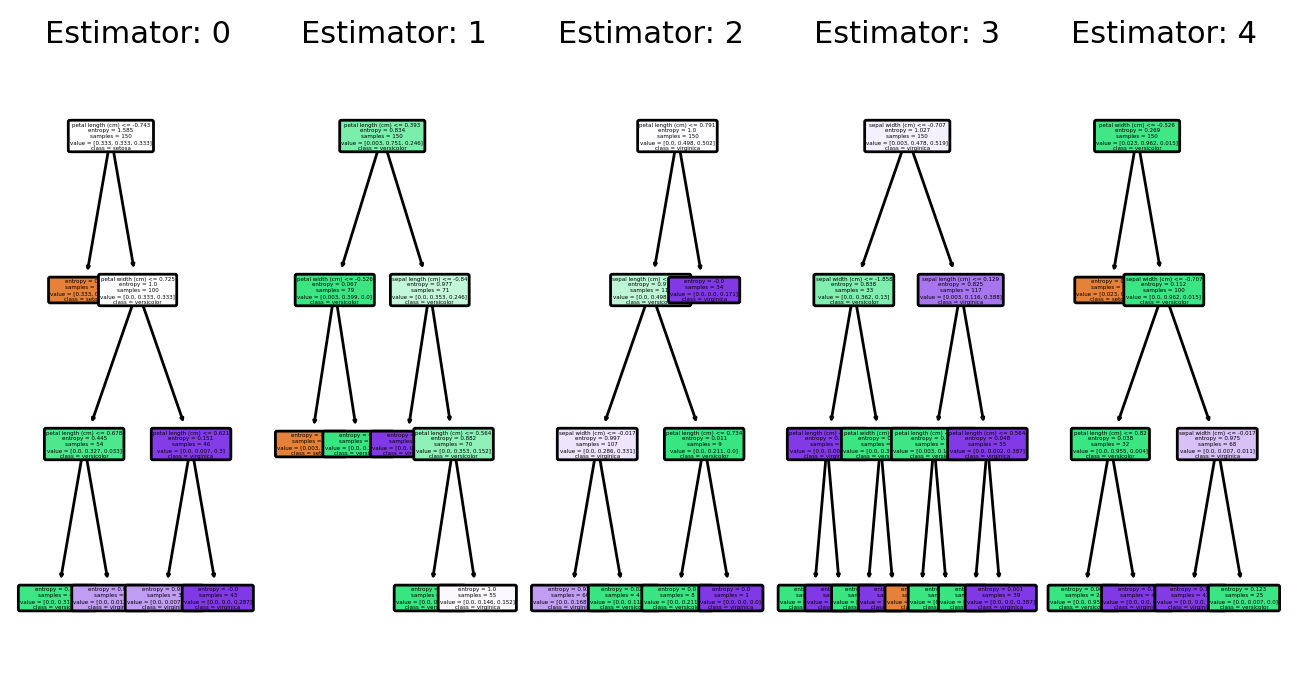

In [38]:
from sklearn.tree import plot_tree# DOT data
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (8,4), dpi=200)

for index in range(0, 5):

    dot_data = plot_tree(adaboost_clf.estimators_[index],
                            feature_names=iris_dataset['feature_names'], 
                            class_names=iris_dataset['target_names'], 
                            filled=True, rounded=True, ax = axes[index],
                            fontsize= 2)
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.show()
# Draw graph

In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.05, random_state=42)
ada_clf.fit(X_train_m, y_train_m)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.05, n_estimators=200, random_state=42)

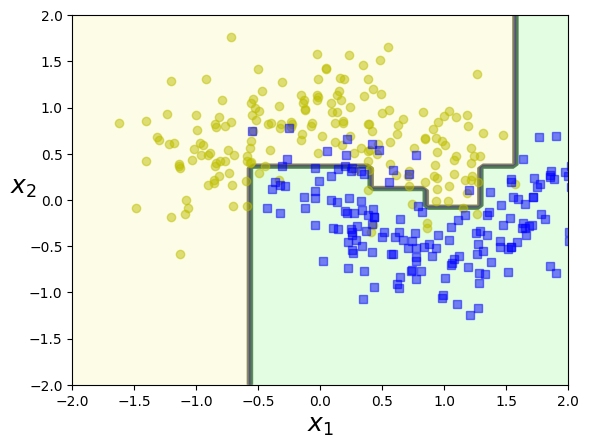

In [40]:
plot_decision_boundary(ada_clf, X_train_m, y_train_m)

### `Gradient Bossting`
* > `A simpler way to train GB ensembles is to use Scikit-Learn’s GradientBoostingRegressor class,  Much like the RandomForestRegressor class, it has hyperparameters to control the growth of Decision Trees, The same is done for classification`

### Quick implmentation for Gradient Boosting Regressor

In [41]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
l_r = 0.5

In [42]:
from sklearn.tree import DecisionTreeRegressor
# Tree 1
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [43]:
# Tree 2 learning from residuals of tree 1

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [44]:
# Tree 3 learning from residuals of tree 2

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

### Prediction using the implmentation

In [45]:
X_new = np.array([[0.8]])
y_pred = tree_reg1.predict(X_new) +  l_r * tree_reg2.predict(X_new) + l_r * tree_reg3.predict(X_new)
y_pred

array([0.63941814])

### Viaualizing the three boosting steps

In [46]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

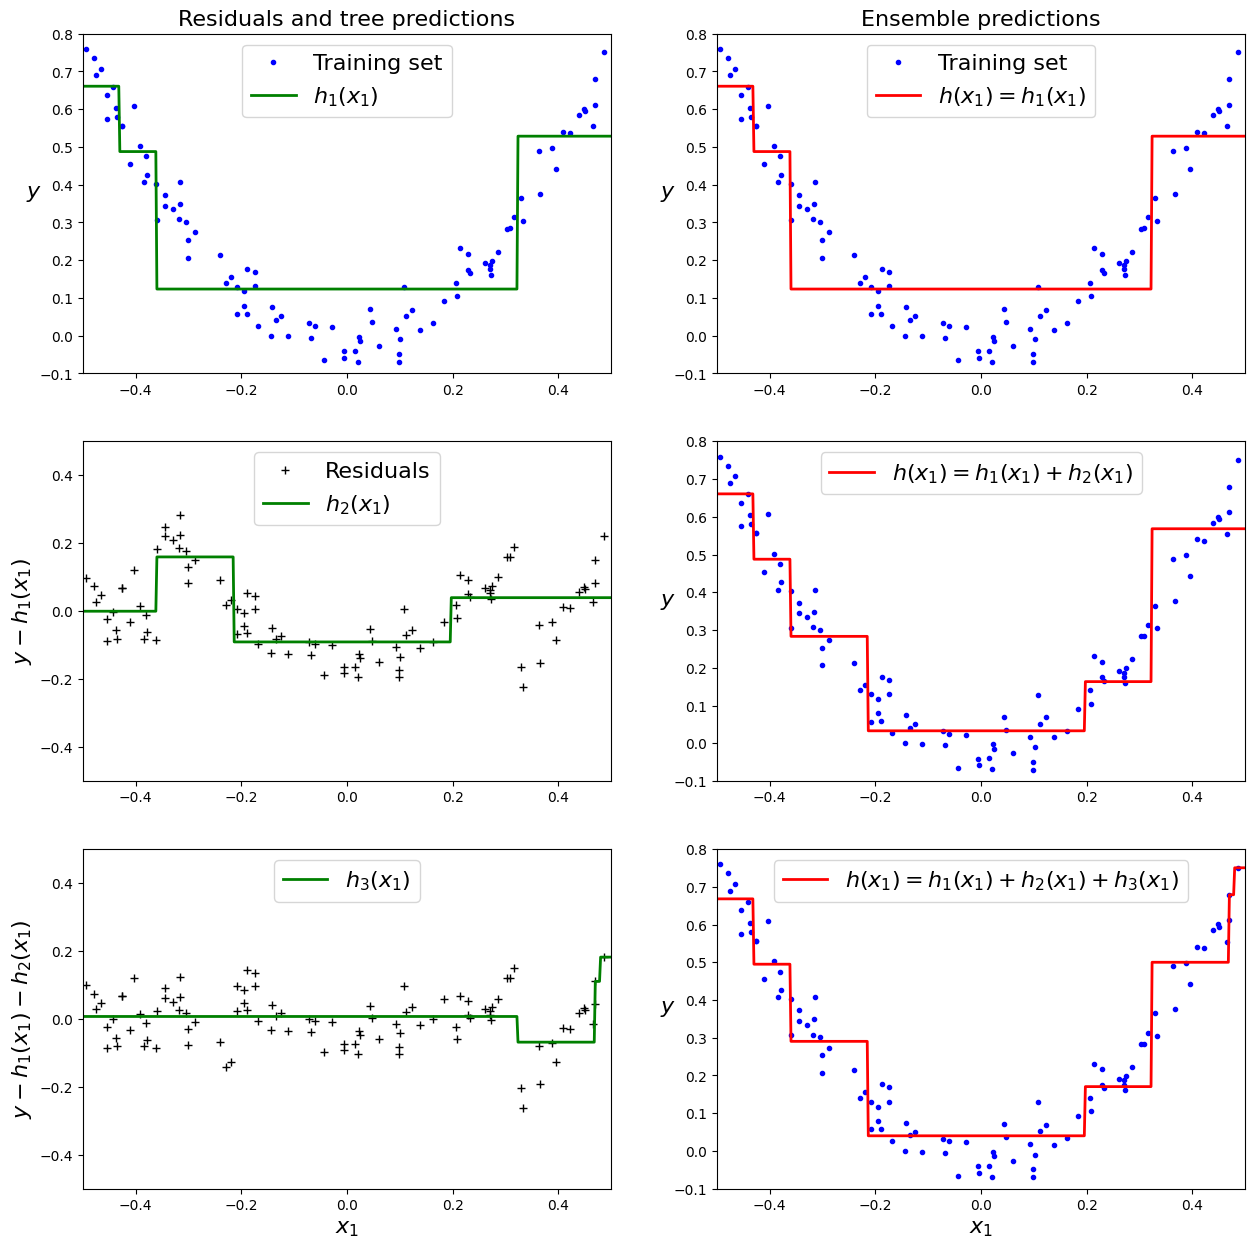

In [47]:
plt.figure(figsize=(15,15))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

### Sklearn Implmentation for GBR

In [48]:
# gradient boosting with lambda of 1
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

# gradient boosting with lambda of 0.1
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.5, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(learning_rate=0.5, max_depth=2, n_estimators=3,
                          random_state=42)

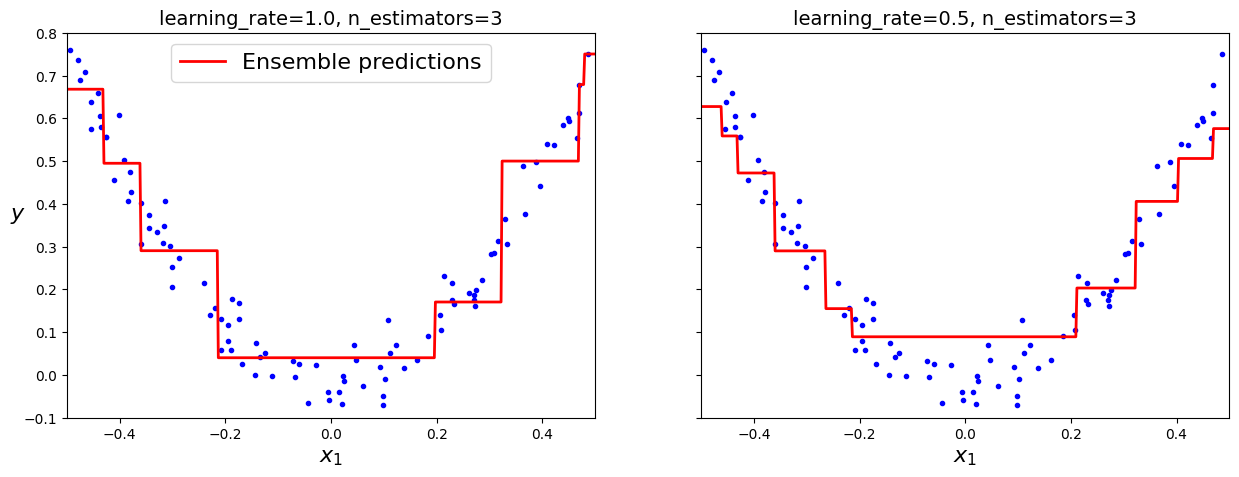

In [49]:
fix, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [50]:
## The learning_rate hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1 ..
## you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better
## learning_rate works as (Regularization technique called 'shrinkage')
gradBoost_clf = GradientBoostingClassifier(n_estimators=150, max_depth=3, learning_rate=0.1)
gradBoost_clf.fit(X_train, y_train)  ## train

GradientBoostingClassifier(n_estimators=150)

In [51]:
## Using cross validation for prediction and evaluation
acc_scores_gradBoost = cross_val_score(estimator=gradBoost_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "GradientBoosting" -- {acc_scores_gradBoost.mean():.3f}', )

## Prediction using cross validation
y_pred_gradBoost = cross_val_predict(estimator=gradBoost_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "GradientBoosting" -- 0.940


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14568\2306249133.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


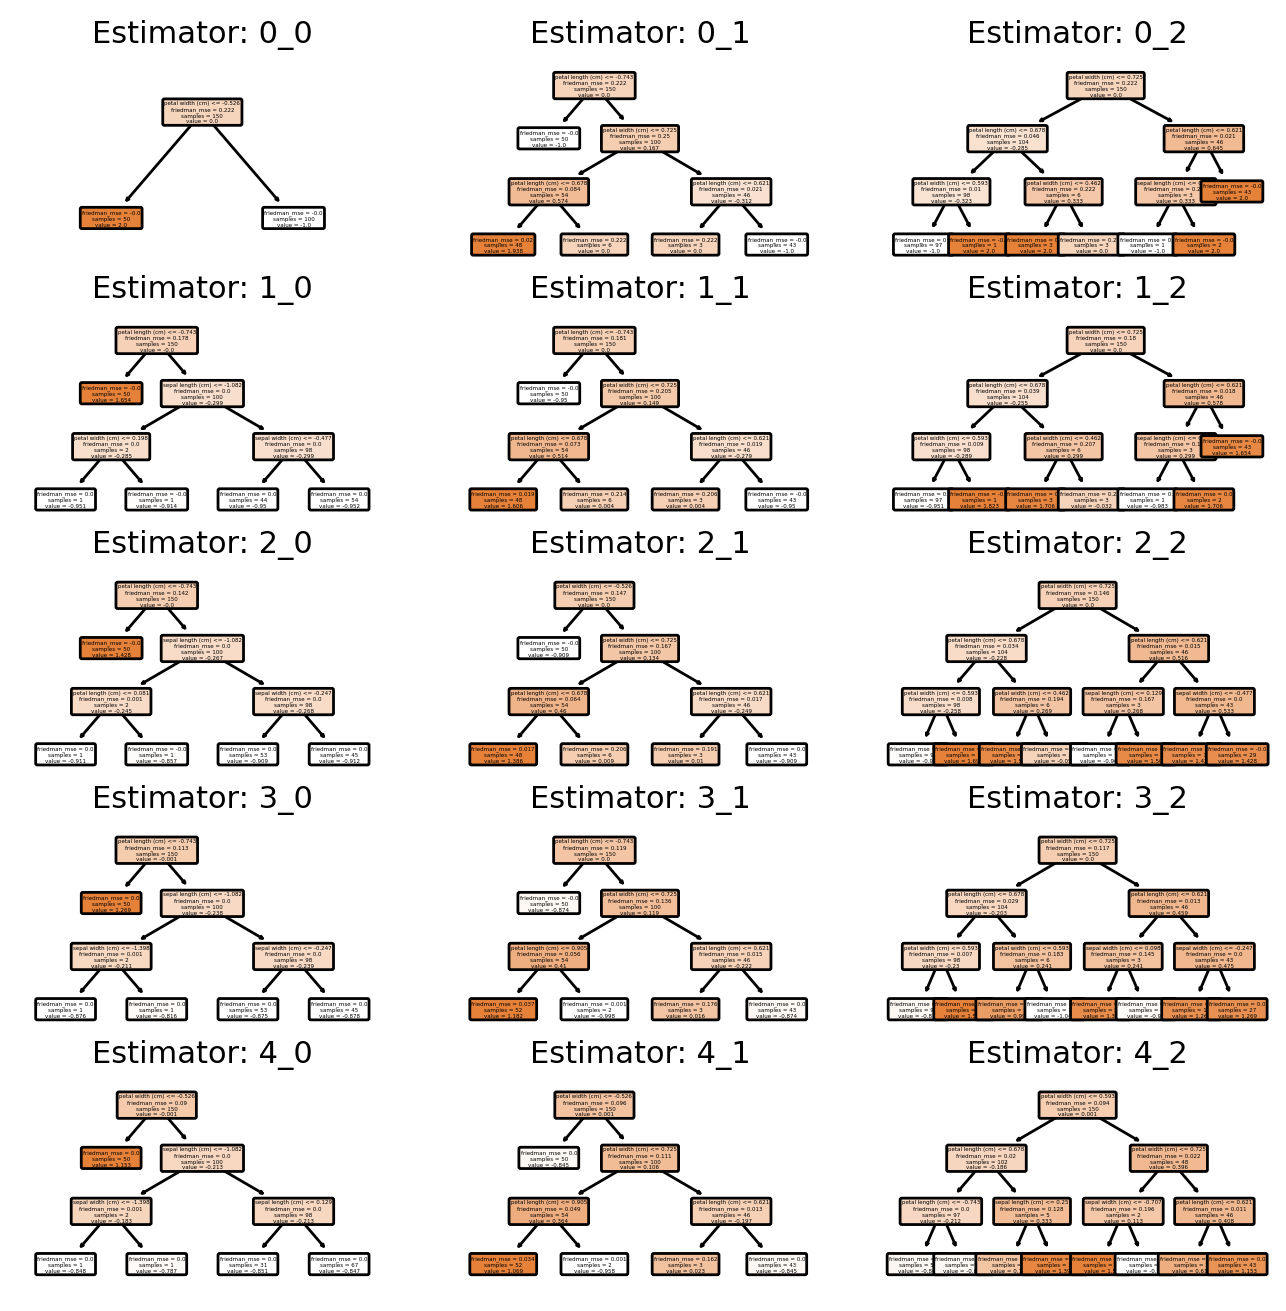

In [52]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 5,ncols = 3,figsize = (8,8), dpi=200)

for index1 in range(0, 5):
    for index2 in range(0, 3):
        dot_data = plot_tree(gradBoost_clf.estimators_[index1][index2],
                                feature_names=iris_dataset['feature_names'], 
                                class_names=iris_dataset['target_names'], 
                                filled=True, rounded=True,
                                fontsize= 2,  ax = axes[index1][index2],)
        axes[index1][index2].set_title('Estimator: ' + str(index1) + "_" + str(index2), fontsize = 11)
fig.show()
# Draw graph

### Gradient Boosting with Early stopping
- after the training of a bug number of estimators we test a plenty of them on unseen data to know where to stop
- its a technique of regularization like pruning

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

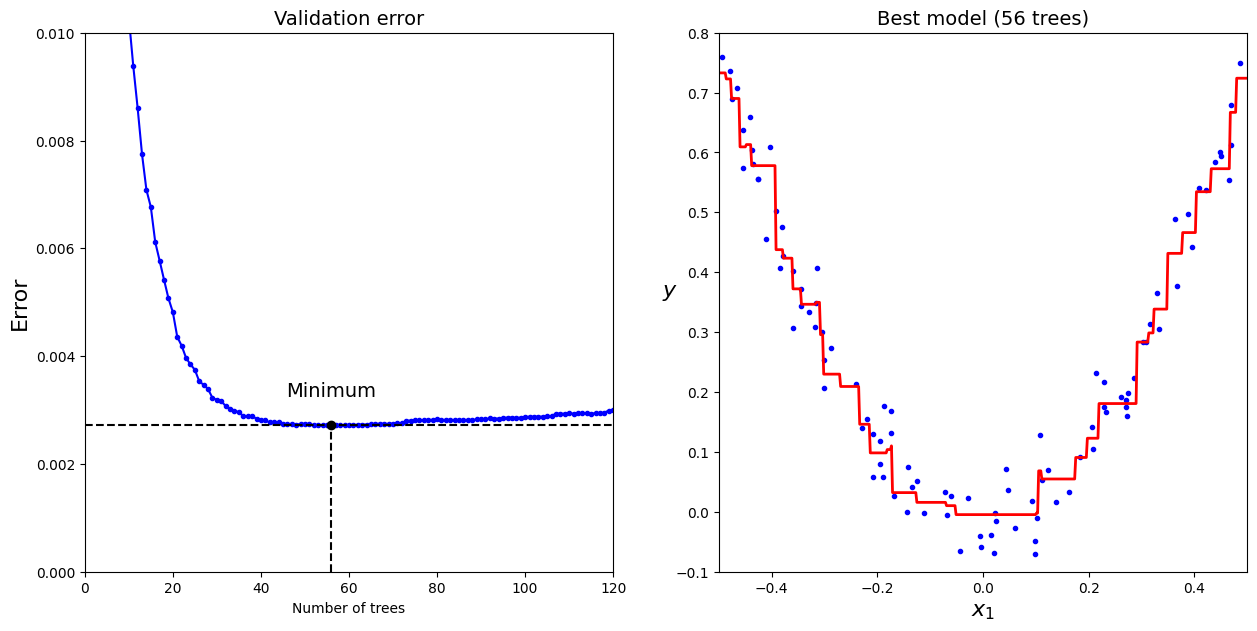

In [54]:
plt.figure(figsize=(15, 7))
min_error = np.min(errors)

plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

### Early stopping with some patience (interrupts training only after there's no improvement for 5 epochs):

In [55]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)
from copy import deepcopy
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)

    if val_error < min_val_error:
        print(f'epoch {n_estimators}')
        print(f'n_estimators:{n_estimators}  error {min_val_error} ====> {val_error}')
        min_val_error = val_error
        error_going_up = 0
        best_model = deepcopy(gbrt)

    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

epoch 1
n_estimators:1  error inf ====> 0.03976434066090687
epoch 2
n_estimators:2  error 0.03976434066090687 ====> 0.03301153878946109
epoch 3
n_estimators:3  error 0.03301153878946109 ====> 0.027663386192027795
epoch 4
n_estimators:4  error 0.027663386192027795 ====> 0.023337263188229852
epoch 5
n_estimators:5  error 0.023337263188229852 ====> 0.020390590545872743
epoch 6
n_estimators:6  error 0.020390590545872743 ====> 0.017820174421765502
epoch 7
n_estimators:7  error 0.017820174421765502 ====> 0.015262814214454865
epoch 8
n_estimators:8  error 0.015262814214454865 ====> 0.013228529533567415
epoch 9
n_estimators:9  error 0.013228529533567415 ====> 0.011758450328306618
epoch 10
n_estimators:10  error 0.011758450328306618 ====> 0.010288335529306629
epoch 11
n_estimators:11  error 0.010288335529306629 ====> 0.009391268210618017
epoch 12
n_estimators:12  error 0.009391268210618017 ====> 0.008605826199167754
epoch 13
n_estimators:13  error 0.008605826199167754 ====> 0.007745553291052828

In [64]:
best_model.predict(X_val)

array([ 0.18080631,  0.18080631, -0.00464762,  0.18080631,  0.05485103,
       -0.00464762, -0.00464762,  0.09842766,  0.60939765,  0.57292803,
        0.37229396,  0.28345885,  0.37229396,  0.01580878,  0.57806692,
        0.09842766,  0.12289376,  0.03209379,  0.57806692, -0.00464762,
        0.18080631,  0.57806692,  0.22991895,  0.43776035,  0.66704572])

### `XGBoost`
* > `If I will train one model and tune one model and I don't have time to think a lot, of course I will choose it`

In [79]:
X = df_iris.drop(columns=['target'], axis=1)
y = df_iris['target']

In [80]:
## XGBoost is an API, not an algorithm, it is the implementation of Gradient Boosting, but much faster and strong
## I recommend you to know much more about xgboost --> it is very powerfull API

## objective --> 'multi:softproba' ---> for multiclassification
## objective --> 'binary:logistic' ---> for binaryclassification

## Here I tried to put some Hyperparams
xgb_clf = XGBClassifier(objective='multi:softprob',   ## The most one according to your task (here, Multiclass class.)
                            learning_rate=0.01,           ## eta or learning_rate 
                            n_estimators=100,             ## number of trees
                            max_depth=3,                    ## depth of trees
                            use_label_encoder=False,
                            )     ## specify the number of classes



xgb_clf.fit(X, y) ## train, deal with it as an ordinary model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [81]:
## Using cross validation for prediction and evaluation
acc_scores_xgboost = cross_val_score(estimator=xgb_clf, X=X, y=y, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "XGBoost" -- {acc_scores_xgboost.mean():.3f}', )

## Prediction using cross validation
y_pred_xgboost = cross_val_predict(estimator=xgb_clf, X=X, y=y, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "XGBoost" -- 0.960


[treeplot] >Set path in environment.


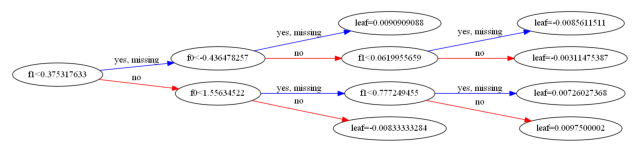

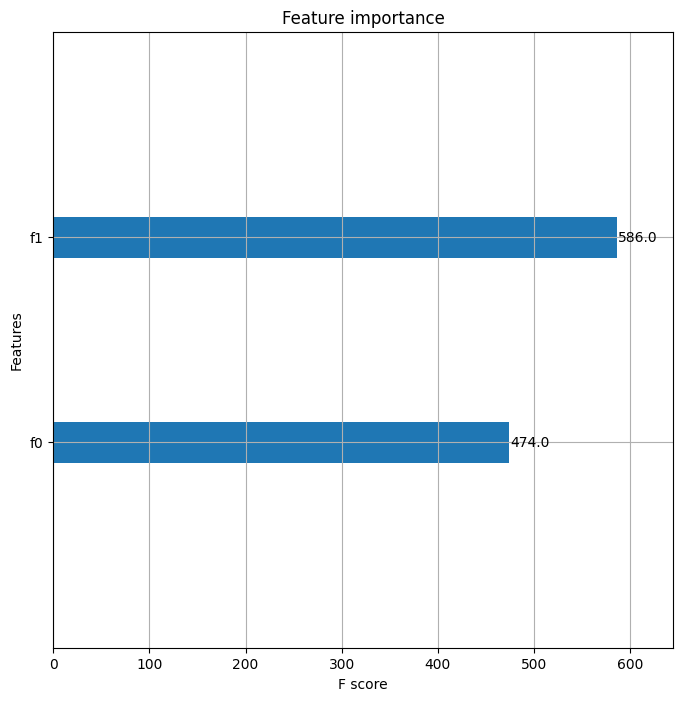

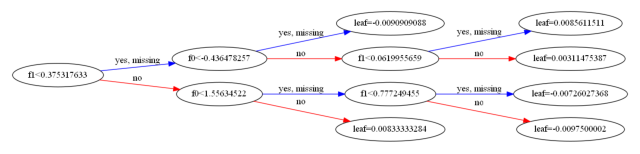

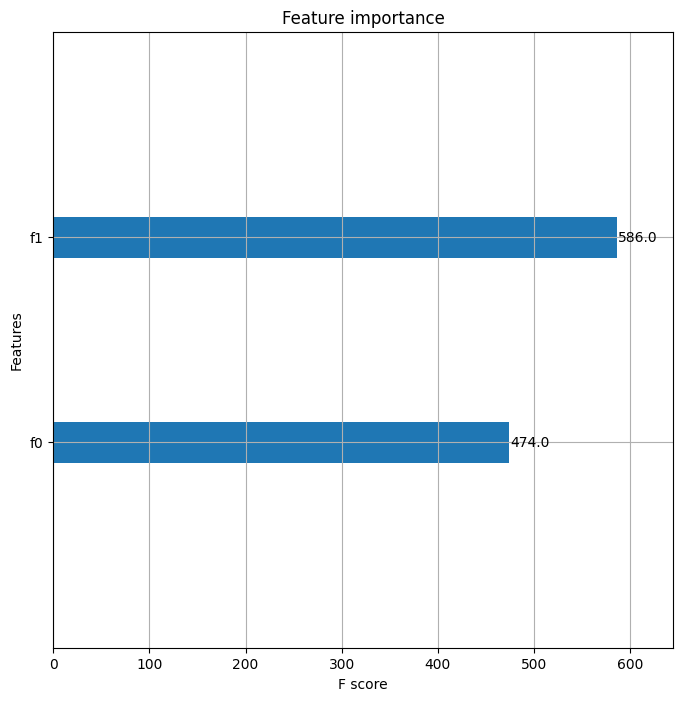

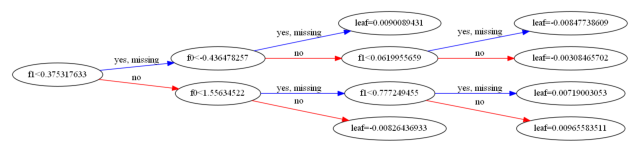

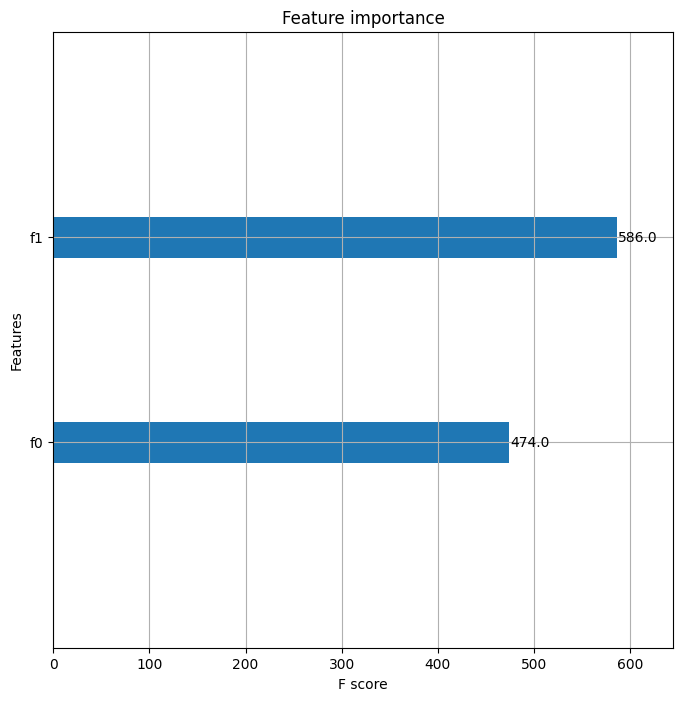

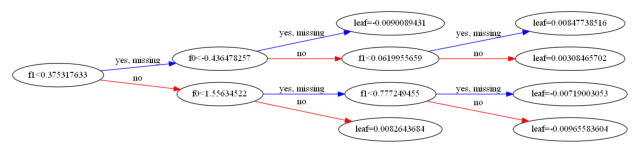

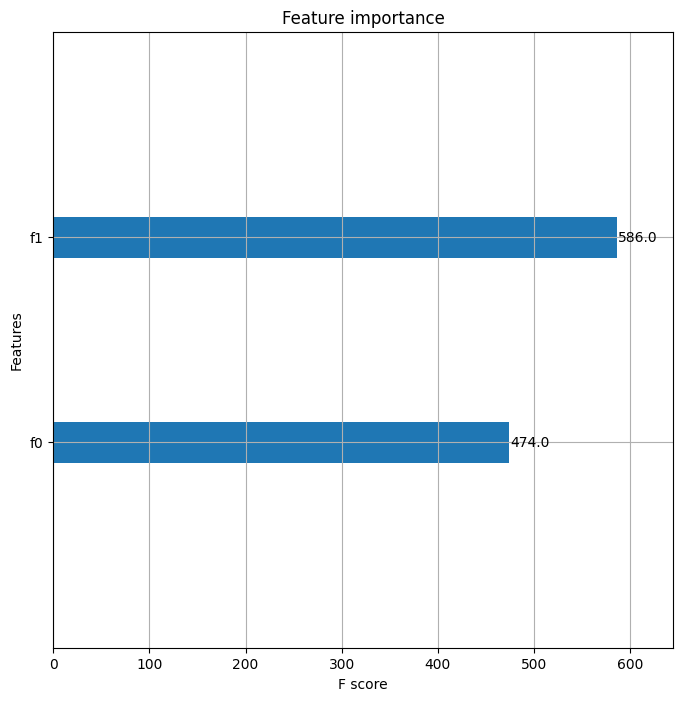

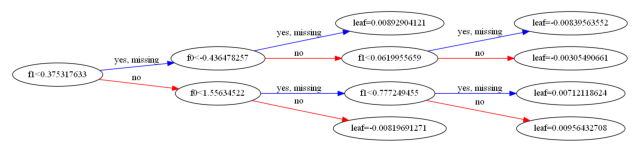

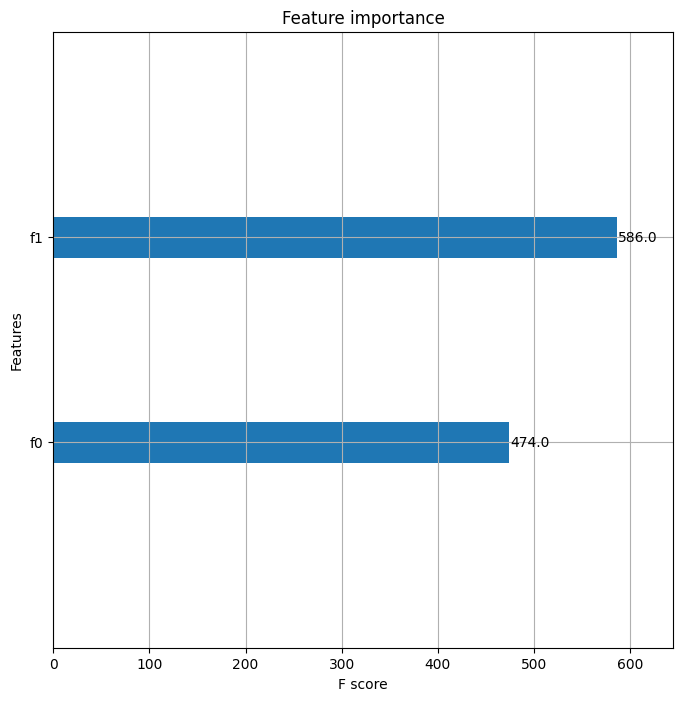

In [76]:
import treeplot as tree
for index in range(0, 5):
        ax =tree.plot(xgb_clf, 
                featnames=iris_dataset['feature_names'],
                num_trees =index,  #the estimator number
                verbose = 0, figsize=(8,8), plottype='vertical')
plt.show()
# Draw graph


In [69]:
xgb_reg = XGBRegressor(random_state=42)

xgb_reg.fit(X_train, y_train,
                            eval_set=[(X_val, y_val)],
                            early_stopping_rounds=2,
                            verbose = 1)

y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred) 
print("Validation MSE:", val_error)           

[0]	validation_0-rmse:0.22834
[1]	validation_0-rmse:0.16224
[2]	validation_0-rmse:0.11843
[3]	validation_0-rmse:0.08760
[4]	validation_0-rmse:0.06848


[5]	validation_0-rmse:0.05709
[6]	validation_0-rmse:0.05297
[7]	validation_0-rmse:0.05129
[8]	validation_0-rmse:0.05155
[9]	validation_0-rmse:0.05211
Validation MSE: 0.002630868681577655


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


**Grid Search CV Code**

In [60]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

#intializing the intervals to search the best parameters in 
params = {  'learning_rate':[0.1, 0.5, 0.4, 0.3],
            'n_estimators':[50, 100, 200]} # dummy, for demonstration only

xgb = XGBRegressor(learning_rate=0.02, n_estimators=100,silent=True, nthread=1)

grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='neg_mean_squared_error', n_jobs=4)

grid.fit(X_train, y_train)
#get instace from best estimator
grid.best_estimator_.predict(X_val)

[23:40:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




array([ 0.1787595 ,  0.1787595 , -0.02901377,  0.20514904,  0.05914646,
       -0.01093842, -0.01691335,  0.08737916,  0.57861793,  0.5914394 ,
        0.3721627 ,  0.28523102,  0.3721627 ,  0.01741738,  0.5787176 ,
        0.08837771,  0.12311856,  0.05058355,  0.56042445,  0.00471925,
        0.1787595 ,  0.6004974 ,  0.23484273,  0.41628188,  0.67406064],
      dtype=float32)

In [61]:
# load data
from sklearn.datasets import load_breast_cancer
breast_cancer_dataset = load_breast_cancer()
# get information about the data format 
print(dir(breast_cancer_dataset))
print(breast_cancer_dataset.data.shape)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
(569, 30)


In [62]:
# Exploring different hyperparameter configurations of Random Forest via GridSearchCV
clf = GridSearchCV(
    # providing the model architecture
    RandomForestClassifier(),
    # defining the parameter grid to test upon
    {
        "n_estimators" : [10, 20, 50, 100, 250, 500],
        "criterion" : ["gini", "entropy"]
    },
    # number of cross validations
    cv = 5, 
    return_train_score = True
)
# pass data to models
clf.fit(breast_cancer_dataset.data, breast_cancer_dataset.target)
results = pd.DataFrame(clf.cv_results_)
# discard most of the additional information obtained during this process
results[["param_n_estimators", "param_criterion", "mean_test_score"]]

,param_n_estimators,param_criterion,mean_test_score
0,10,gini,0.950800
1,20,gini,0.954355
2,50,gini,0.963127
3,100,gini,0.961357
4,250,gini,0.964866
5,500,gini,0.961357
6,10,entropy,0.949045
7,20,entropy,0.966620
8,50,entropy,0.959571
9,100,entropy,0.970144
